Анализ данных 8 Лабораторная работа.

Задачи для самостоятельной работы.

**1. Построить график тангенса на промежутке от -Pi/3 до +Pi/3.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

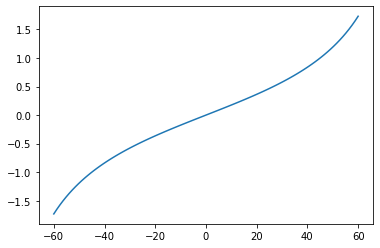

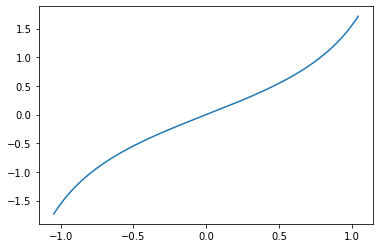

In [8]:
angle_min = - np.pi/3
angle_max = np.pi/3
res = 0.01
angle_list = [a for a in np.arange(angle_min,angle_max,res)]
angle_tan_list = [math.tan(a) for a in angle_list]
plt.plot(angle_list, angle_tan_list)
plt.show()

**2. Предположим есть некий завод, который производит 3 типа деталей по 1000 в месяц. Каждый тип имеет некоторое количество брака в месяц. Количество брака подчиняется закону нормального распределения, а следовательно имеет некоторое мат.ожидание и среднее отклонение. Данные по мат.ожиданию заданы, а СКО предстоит найти.**

* 1) тип - в среднем 25 деталей. При этом 99,72% попадают в промежуток +/- 9, 
* 2) тип - в среднем 35 деталей. При этом 99,72% попадают в промежуток +/- 18, 
* 3) тип - в среднем 50 деталей. При этом 99,72% попадают в промежуток +/- 30.  

Построить гистограммы распределения для всех типов деталей.

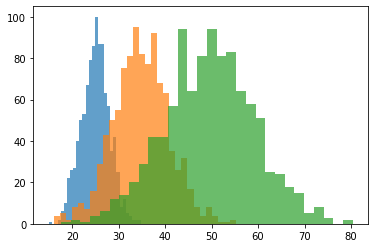

In [143]:
data1 = np.arange(26) 
df1 = pd.DataFrame(data) 
res_std1 = df1.std() 
print(res_std1)

0    7.359801
dtype: float64


In [144]:
data2 = np.arange(36) 
df2 = pd.DataFrame(data2) 
res_std2 = df2.std() 
print(res_std2)

0    10.535654
dtype: float64


In [145]:
data3 = np.arange(51) 
df3 = pd.DataFrame(data3) 
res_std3 = df3.std() 
print(res_std3)

0    14.866069
dtype: float64


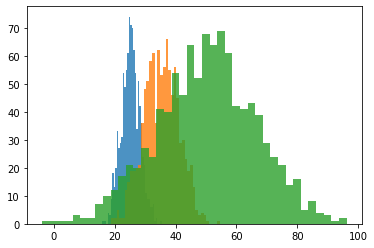

In [150]:
x1 = np.random.normal (25, 9/3, 1000)
x2 = np.random.normal (35, 18/3, 1000)
x3 = np.random.normal (50, 50/3, 1000)
kwargs = dict(histtype='stepfilled', alpha=0.8, bins=40)
plt.hist (x1, **kwargs)
plt.hist (x2, **kwargs)
plt.hist (x3, **kwargs);

**3. Импортируйте датасет алмазов (diamonds) из библиотеки Seaborn. Отредактируйте датасет так, чтобы у Вас остались тоько числовые колонки. Постройте для получившегося датасета матрицу корреляции. Задайте цветовую гамму 'plasma'.**

In [9]:
import seaborn as sns
data1 = sns.load_dataset("diamonds")

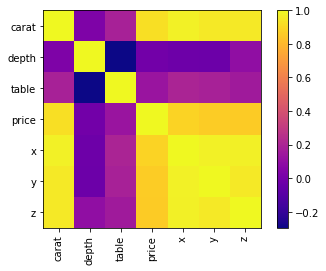

In [16]:
data1_numeric = data1.select_dtypes(include=[np.number])
numeric_cols = data1_numeric.columns.values
print(data1_numeric)

       carat  depth  table  price     x     y     z
0       0.23   61.5   55.0    326  3.95  3.98  2.43
1       0.21   59.8   61.0    326  3.89  3.84  2.31
2       0.23   56.9   65.0    327  4.05  4.07  2.31
3       0.29   62.4   58.0    334  4.20  4.23  2.63
4       0.31   63.3   58.0    335  4.34  4.35  2.75
...      ...    ...    ...    ...   ...   ...   ...
53935   0.72   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 7 columns]


In [32]:
corr = data1_numeric.corr()
corr.head(10)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


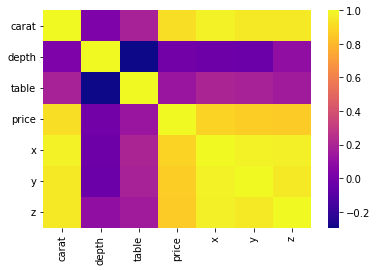

In [56]:
sns.heatmap(corr, cmap='plasma')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

**4. Создайте датафрейм колебаний некоторой условной величины MegaCoin в пределах 500...600 megacoin'ов на протяжении 30 дней (использовать date_range). Постройте график.**

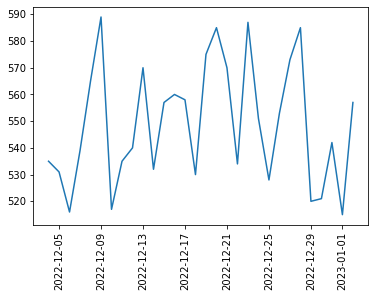

In [64]:
coin = [np.random.randint(500,600) for i in range (30)]
data_1 = pd.Series(coin)
data_coin = data_1.to_frame(name='MegaCoin')
dni = pd.date_range('05/12/2022', periods=30)
data_coin.index = dni
data_coin.head()

,MegaCoin
2022-05-12,538
2022-05-13,595
2022-05-14,542
2022-05-15,552
2022-05-16,507


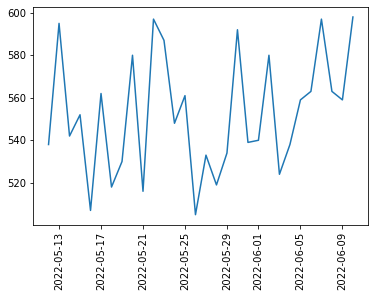

In [67]:
plt.plot(data_coin, linestyle='-')
plt.xticks(rotation=90)
plt.show()

**5. Создайте датасет подобный тому что был создан выше, но только теперь колебания будут от 500 до 800 и временной промежуток 12 месяцев (365 дней). Постройте график bar по месяцам.**

<BarContainer object of 365 artists>

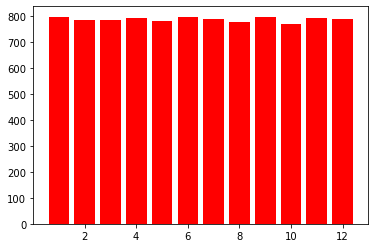

In [107]:
stock = [np.random.randint(500,800) for i in range (365)]
data_2 = pd.Series(stock)
data_stock = data_2.to_frame(name='stock')
dni2 = pd.date_range('01/01/2022', periods=365)
data_stock.index = dni2
data_stock.head()

,stock
2022-01-01,619
2022-01-02,516
2022-01-03,505
2022-01-04,687
2022-01-05,683


<BarContainer object of 12 artists>

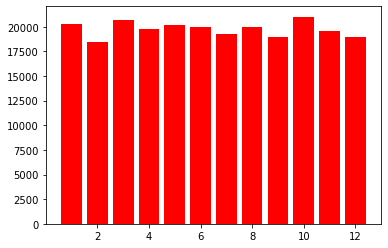

In [109]:
data_stock = data_stock.resample('m').sum()
plt.bar (data_stock.index.month, data_stock['stock'], color='r')